# **API**


chatbot para la detencion de bullying
--> captura de informacion con una api


##**Conectarse a la API de sendpulse**

Credenciales de la API

*   user_id = 'fc74fe057aced708a712493b4d235515'
*   secret = 'a49d9e8b51001d2249d6c9f83681b69d'

URL para obtener el token de acceso
*   token_url = 'https://api.sendpulse.com/oauth/access_token'

URL para la API del chatbot
*   https://api.sendpulse.com/telegram/chats
*   bot_id ='65746a856e9d24c086045e48'

In [1]:
#Librerias
import requests
import sqlite3
import json
import pandas as pd

In [2]:
# Credenciales y URLs proporcionadas
user_id = 'fc74fe057aced708a712493b4d235515'
secret = 'a49d9e8b51001d2249d6c9f83681b69d'
token_url = 'https://api.sendpulse.com/oauth/access_token'
api_url = 'https://api.sendpulse.com/telegram/chats'
bot_id = '65746a856e9d24c086045e48'

In [3]:
# Obtener el token de acceso
data = {
    'grant_type': 'client_credentials',
    'client_id': user_id,
    'client_secret': secret
}
response = requests.post(token_url, data=data)
token_info = response.json()
access_token = token_info['access_token']

In [4]:
data

{'grant_type': 'client_credentials',
 'client_id': 'fc74fe057aced708a712493b4d235515',
 'client_secret': 'a49d9e8b51001d2249d6c9f83681b69d'}

In [8]:
# Extraer los datos de la API del chatbot
headers = {
    'Authorization': f'Bearer {access_token}'
}
params = {
    #'bot_id': bot_id
}
response = requests.get(api_url, headers=headers, params=params)
chat_data = response.json() #me traigo el json

In [6]:
print(json.dumps(chat_data, indent=4))

{
    "success": true,
    "data": [
        {
            "inbox_last_message": {
                "contact_id": "66653f33c1f62b1543053d23",
                "bot_id": "65746a856e9d24c086045e48",
                "campaign_id": null,
                "sent_by": null,
                "direction": 1,
                "type": [],
                "status": 1,
                "channel": null,
                "campaign_message_number": null,
                "block_id": null,
                "send_block_id": null,
                "edited_at": null,
                "edited_by": null,
                "created_at": "2024-06-10T04:15:55+00:00",
                "id": "66667dfbd26ef6d1c20e81c5",
                "data": {
                    "text": "Noche",
                    "parse_mode": null,
                    "disable_web_page_preview": null,
                    "disable_notification": null,
                    "reply_to_message": null,
                    "reply_markup": null,
                 

In [9]:
chat_data['data']

[{'inbox_last_message': {'contact_id': '66653f33c1f62b1543053d23',
   'bot_id': '65746a856e9d24c086045e48',
   'campaign_id': None,
   'sent_by': None,
   'direction': 1,
   'type': [],
   'status': 1,
   'channel': None,
   'campaign_message_number': None,
   'block_id': None,
   'send_block_id': None,
   'edited_at': None,
   'edited_by': None,
   'created_at': '2024-06-10T04:15:55+00:00',
   'id': '66667dfbd26ef6d1c20e81c5',
   'data': {'text': 'Noche',
    'parse_mode': None,
    'disable_web_page_preview': None,
    'disable_notification': None,
    'reply_to_message': None,
    'reply_markup': None,
    'protect_content': None,
    'run_chain_id': None,
    'payload_contact_variables': None,
    'message_id': 1957}},
  'inbox_unread': 11,
  'contact': {'bot_id': '65746a856e9d24c086045e48',
   'status': 1,
   'operator': None,
   'type': 1,
   'last_activity_at': '2024-06-10T04:15:55+00:00',
   'referral_source': None,
   'quick_replies': [],
   'variables': {'TestigoVictima': 'Te

In [11]:
from pandas import json_normalize

# Aplanar la estructura JSON
df = json_normalize(chat_data['data']) #lo aplano y lo transformo en ds

# Mostrar el DataFrame
df

,inbox_unread,inbox_last_message.contact_id,inbox_last_message.bot_id,inbox_last_message.campaign_id,inbox_last_message.sent_by,inbox_last_message.direction,inbox_last_message.type,inbox_last_message.status,inbox_last_message.channel,inbox_last_message.campaign_message_number,...,contact.variables.Ciudad,contact.variables.LugarEscuela,contact.variables.Relato,contact.variables.TipoDenuncia,contact.variables.NombreApellido,contact.variables.Email,contact.variables.Telefono,contact.variables.Ubicacion1,contact.variables.Sexo,contact.variables.Consentimiento
0,11,66653f33c1f62b1543053d23,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62,6640b1eeb88c76ed3c0e0107,6640b1d869a72f980b0b7f03,None,None,1,[],1,None,None,...,Berrotaran,Patio,Me pegaron,Anónima 🙊,NaN,NaN,NaN,NaN,NaN,NaN
2,0,65746a8f8d16bbfb2f0e797c,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,Me pegaron,NaN,Leo Lopez,leonardolopez71@hotmail.com,4.444000e+03,"https://maps.google.com/?q=-34.512955,-58.494296",Otro,NaN
3,4,6658f8ab9e1a48117c07b1b3,6640b1d869a72f980b0b7f03,None,None,1,[],1,None,None,...,Tres arroyos,Aula,Estaban en el salón y empezaron a poner apodos...,Con mis datos 😀,NaN,NaN,NaN,NaN,NaN,No ❌
4,31,6640d52f6b1b55227302553f,6640b1d869a72f980b0b7f03,None,None,1,[],1,None,None,...,BS AS,Comedor,me dijeron negrita,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,66489eaaa7d5a9aa990967e4,6640b1d869a72f980b0b7f03,None,None,1,[],1,None,None,...,CABA,Patio,Test test,Anónima 🙊,NaN,NaN,NaN,NaN,NaN,NaN
6,1,664560ca16dadba5db024de7,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,65748d628d16bbfb2f0e841d,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,Se ríen de mí porque soy negrita.,NaN,NombrePersona1,correofalso1@gmail.com,2.334457e+07,"https://maps.google.com/?q=-34.512966,-58.494318",Mujer 🚺,NaN
8,0,65cbda14147383e32b06a7a8,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NombrePersona2,correofalso2@gmail.com,3.515573e+09,NaN,Fem,NaN
9,0,65e9e8a91cda8a594806e561,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hombre 🚹,NaN


# **Preprocesamiento**

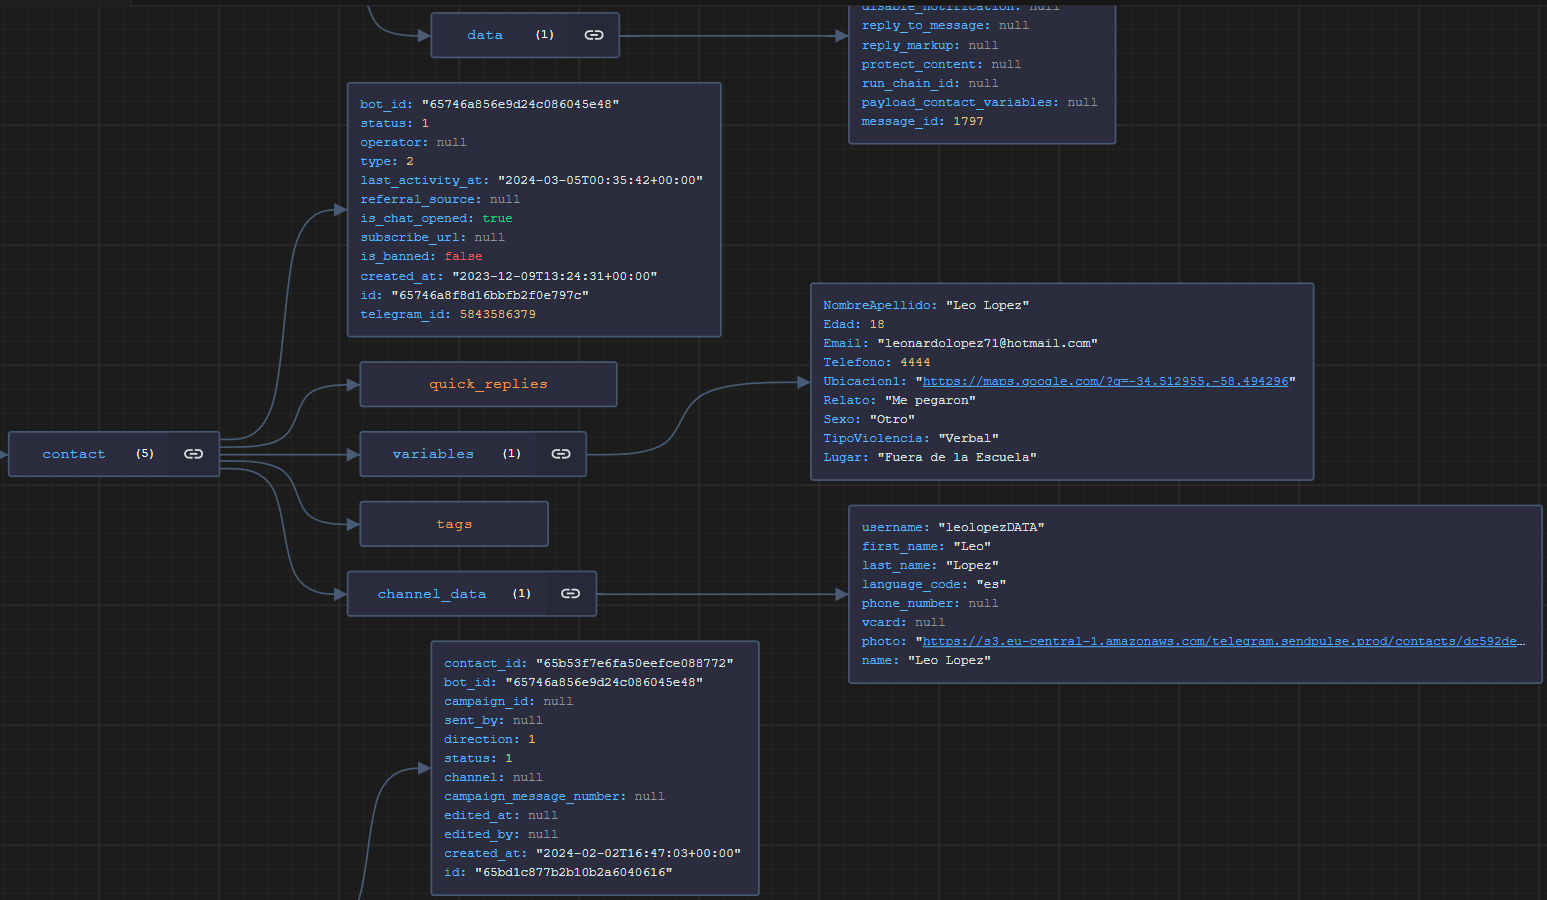

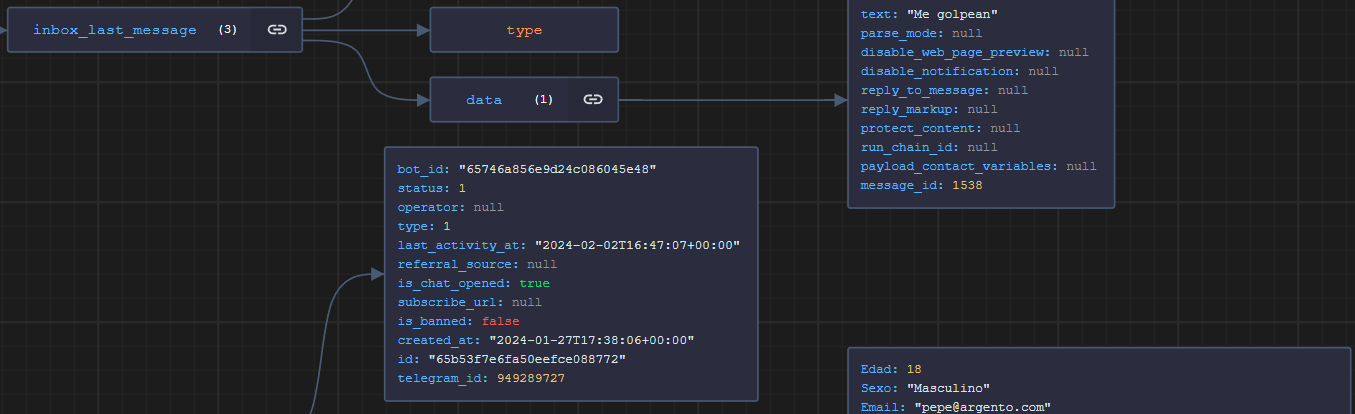

In [12]:
data = chat_data['data']
filtered_data = [ #variable donde pongo los filtros que quiero definir
    {
        'inbox_last_message': entry['inbox_last_message'],
        'contact': entry['contact']
    }
    for entry in data
]

filtered_data
# Convertir filtered_data en un DataFrame de pandas
df = pd.DataFrame(filtered_data)

# Dividir los diccionarios en columnas adicionales
inbox_last_message_cols = pd.json_normalize(df['inbox_last_message'])
contact_cols = pd.json_normalize(df['contact'])

# Unir las columnas adicionales al DataFrame original
df = pd.concat([df, inbox_last_message_cols, contact_cols], axis=1)

# Eliminar las columnas originales
df.drop(['inbox_last_message', 'contact'], axis=1, inplace=True)
df = df.dropna(axis=1, how='all')

In [13]:
# Convertir la columna 'data.date' a formato de fecha
df['data.date'] = pd.to_datetime(df['data.date'], unit='s')  # suponiendo que 'data.date' está en formato UNIX timestamp

# Rellenar los valores faltantes en 'variables.Sexo'
df['variables.Sexo'].fillna(df['variables.Genero'], inplace=True)

# Rellenar los valores faltantes en 'variables.Telefono' con los valores de 'variables.TelefonoIngresado'
df['variables.Telefono'].fillna(df['variables.TelefonoIngresado'], inplace=True)

df['variables.Ubicacion1'].fillna(df['variables.UbicacionGPS'], inplace=True)
df['variables.Email'].fillna(df['variables.Mail'], inplace=True)

# Convertir la columna 'variables.Telefono' a formato de número de teléfono
df['variables.Telefono'] = df['variables.Telefono'].astype(str).str.replace(r'(\d{2})(\d{4})(\d{4})', r'(\1) \2-\3')  # Formatear a "(XX) XXXX-XXXX"

df['variables.Edad'].fillna(0, inplace=True)
# Convertir la columna 'variables.Edad' a tipo entero
df['variables.Edad'] = df['variables.Edad'].astype(int)
print(df.columns)

Index(['contact_id', 'bot_id', 'direction', 'type', 'status', 'created_at',
       'id', 'data.text', 'data.message_id', 'data.voice.mime_type',
       'data.voice.file_id', 'data.voice.file_size',
       'data.voice.file_unique_id', 'data.voice.duration',
       'data.audio_transcription.text', 'data.token', 'data.date', 'bot_id',
       'status', 'type', 'last_activity_at', 'referral_source',
       'quick_replies', 'tags', 'is_chat_opened', 'is_banned', 'created_at',
       'id', 'telegram_id', 'variables.TestigoVictima',
       'variables.TipoViolencia', 'variables.Lugar', 'variables.Curso',
       'variables.Turno', 'channel_data.username', 'channel_data.first_name',
       'channel_data.last_name', 'channel_data.language_code',
       'channel_data.photo', 'channel_data.name',
       'variables.NombreApellidoIngresado', 'variables.Edad',
       'variables.Genero', 'variables.Mail', 'variables.TelefonoIngresado',
       'variables.UbicacionGPS', 'variables.Escuela', 'variables.Ciu

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22676\3108662415.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['variables.Sexo'].fillna(df['variables.Genero'], inplace=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22676\3108662415.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [14]:
df

,contact_id,bot_id,direction,type,status,created_at,id,data.text,data.message_id,data.voice.mime_type,...,variables.Ciudad,variables.LugarEscuela,variables.Relato,variables.TipoDenuncia,variables.NombreApellido,variables.Email,variables.Telefono,variables.Ubicacion1,variables.Sexo,variables.Consentimiento
0,66653f33c1f62b1543053d23,65746a856e9d24c086045e48,1,[],1,2024-06-10T04:15:55+00:00,66667dfbd26ef6d1c20e81c5,Noche,1957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
1,6640b1eeb88c76ed3c0e0107,6640b1d869a72f980b0b7f03,1,[],1,2024-05-31T22:34:52+00:00,665a508cd14c2d52ec01ce1e,NaN,496,audio/ogg,...,Berrotaran,Patio,Me pegaron,Anónima 🙊,NaN,esunejemplo@gmail.com,+541148571435,"https://maps.google.com/?q=-34.512966,-58.494318",Hombre 🚹,NaN
2,65746a8f8d16bbfb2f0e797c,65746a856e9d24c086045e48,1,[],1,2024-05-31T22:31:30+00:00,665a4fc298d224acca049075,\options,1925,NaN,...,NaN,NaN,Me pegaron,NaN,Leo Lopez,leonardolopez71@hotmail.com,4444.0,"https://maps.google.com/?q=-34.512955,-58.494296",Otro,NaN
3,6658f8ab9e1a48117c07b1b3,6640b1d869a72f980b0b7f03,1,[],1,2024-05-30T22:48:25+00:00,665902392c07c356e80fc7d7,Hola,492,NaN,...,Tres arroyos,Aula,Estaban en el salón y empezaron a poner apodos...,Con mis datos 😀,NaN,ian.00@hotmail.com,+15664400,"https://maps.google.com/?q=20.79721,5.0E-6",Hombre,No ❌
4,6640d52f6b1b55227302553f,6640b1d869a72f980b0b7f03,1,[],1,2024-05-19T21:32:01+00:00,664a6fd184e559b7100847be,NaN,425,audio/ogg,...,BS AS,Comedor,me dijeron negrita,NaN,NaN,rosadelvallepereyra18@gmail.com,+3585248875,"https://maps.google.com/?q=-34.512977,-58.49434",Mujer 🚺,NaN
5,66489eaaa7d5a9aa990967e4,6640b1d869a72f980b0b7f03,1,[],1,2024-05-18T12:29:02+00:00,66489f0ec7c5be8ab702ecc5,Test test,418,NaN,...,CABA,Patio,Test test,Anónima 🙊,NaN,NaN,nan,NaN,NaN,NaN
6,664560ca16dadba5db024de7,65746a856e9d24c086045e48,1,[],1,2024-05-16T01:26:34+00:00,664560ca79bcb8888d056950,/start,1919,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
7,65748d628d16bbfb2f0e841d,65746a856e9d24c086045e48,1,[],1,2024-04-07T17:09:12+00:00,6612d33810706e364b0f90f4,NaN,1916,audio/ogg,...,NaN,NaN,Se ríen de mí porque soy negrita.,NaN,NombrePersona1,correofalso1@gmail.com,23344566.0,"https://maps.google.com/?q=-34.512966,-58.494318",Mujer 🚺,NaN
8,65cbda14147383e32b06a7a8,65746a856e9d24c086045e48,1,[],1,2024-03-15T13:54:27+00:00,65f45313c87d9cf05c097c6e,mariansavid@gmail.com,1839,NaN,...,NaN,NaN,NaN,NaN,NombrePersona2,correofalso2@gmail.com,3515573222.0,NaN,Fem,NaN
9,65e9e8a91cda8a594806e561,65746a856e9d24c086045e48,1,[],1,2024-03-07T16:18:01+00:00,65e9e8b9ede324c35e028b9a,Hombre 🚹,1807,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,Hombre 🚹,NaN


# **Mapeo**

In [17]:
import folium
import pandas as pd

# Crear un mapa centrado en una ubicación predeterminada
mapa = folium.Map(location=[-34.603722, -58.381592], zoom_start=5)

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows(): #
    # Obtener la ubicación de la columna 'variables.Ubicacion1'
    ubicacion = row['variables.Ubicacion1'] #orientado a registro para recorrerlo

    # Verificar si la ubicación no es NaN
    if not pd.isna(ubicacion):
        # Dividir la cadena de ubicación en latitud y longitud
        lat, lon = map(float, ubicacion.split('=')[-1].split(','))

        # Crear el contenido del popup
        popup_content = f"""
        <b>Testigo/Víctima:</b> {row['variables.TestigoVictima']}<br>
        <b>Nombre:</b> {row['channel_data.name']}<br>
        <b>Foto:</b> <img src="{row['channel_data.photo']}" alt="Foto" width="100" height="100"><br>
        <b>Fecha de creación:</b> {row['created_at']}<br>
        <b>Última actividad:</b> {row['last_activity_at']}<br>
        <b>Tipo de denuncia:</b> {row['variables.TipoDenuncia']}<br>
        <b>Tipo de violencia:</b> {row['variables.TipoViolencia']}<br>
        <b>Relato:</b> {row['variables.Relato']}<br>
        <b>Texto transcrito:</b> {row['data.audio_transcription.text']}<br>
        <b>Escuela:</b> {row['variables.Escuela']}<br>
        <b>Ciudad:</b> {row['variables.Ciudad']}<br>
        <b>Lugar:</b> {row['variables.Lugar']}
        """

        # Agregar un marcador en el mapa con el contenido del popup
        folium.Marker(
            [lat, lon],
            popup=folium.Popup(popup_content, max_width=500)
        ).add_to(mapa)

# Mostrar el mapa
mapa

: 

In [16]:
!pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ------------ --------------------------- 30.7/100.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 100.0/100.0 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   ---------------------------------------- 133.3/133.3 kB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 83.9/83.9 kB 4.6 MB/s eta 0:00:00
